# Homework 3: Visualizing Data with Movies

Name: 

Date: 

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [31]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip
import cftime
import netCDF4 as nc4

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [32]:
# define the path to the data folder
data_folder = 'D:\CS 185C\CS 185C DataSets\Homework3_dataSet\Version5\Alpha\latlon_daily\SST'

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

In [33]:
# read in the data
# I am going to use the SST file for the year 2017
SST_file = os.path.join(data_folder,'SST_20170101.nc')

ds = xr.open_dataset(SST_file, decode_times=False)
time = np.array(ds['TIME'][:])
longitude = np.array(ds['LONGITUDE_T'][:])
latitude = np.array(ds['LATITUDE_T'][:])
SST_2017 = np.array(ds['SST'][:])
SST_2017 = SST_2017[0,:,:] # flatten the data
print(ds) #HOW YOU CAN SEE THE VALUES OF YOUR DATASET!!!!!
ds.close()



<xarray.Dataset> Size: 4MB
Dimensions:      (TIME: 1, LATITUDE_T: 720, LONGITUDE_T: 1440)
Coordinates:
  * TIME         (TIME) float32 4B 9.132e+03
  * LATITUDE_T   (LATITUDE_T) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * LONGITUDE_T  (LONGITUDE_T) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    SST          (TIME, LATITUDE_T, LONGITUDE_T) float32 4MB ...
Attributes:
    description:  ECCO LLC270 daily average


Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [34]:
# define the longitude/latitude bounds (Mine is going to be on the Pacific Ocean)
min_col = np.argmin(np.abs(longitude - (-129.6931)))
max_col = np.argmin(np.abs(longitude - (-115.25)))
min_row = np.argmin(np.abs(latitude - (21)))
max_row =np.argmin(np.abs(latitude - (52.2165)))

Use the row and column bounds to subset the longitude, latitude, and your variable:

In [35]:
# subset the data
SST_2017 = SST_2017[min_row:max_row,min_col:max_col]
longitude = longitude[min_col:max_col]
latitude = latitude[min_row:max_row] # slicing of a list



Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

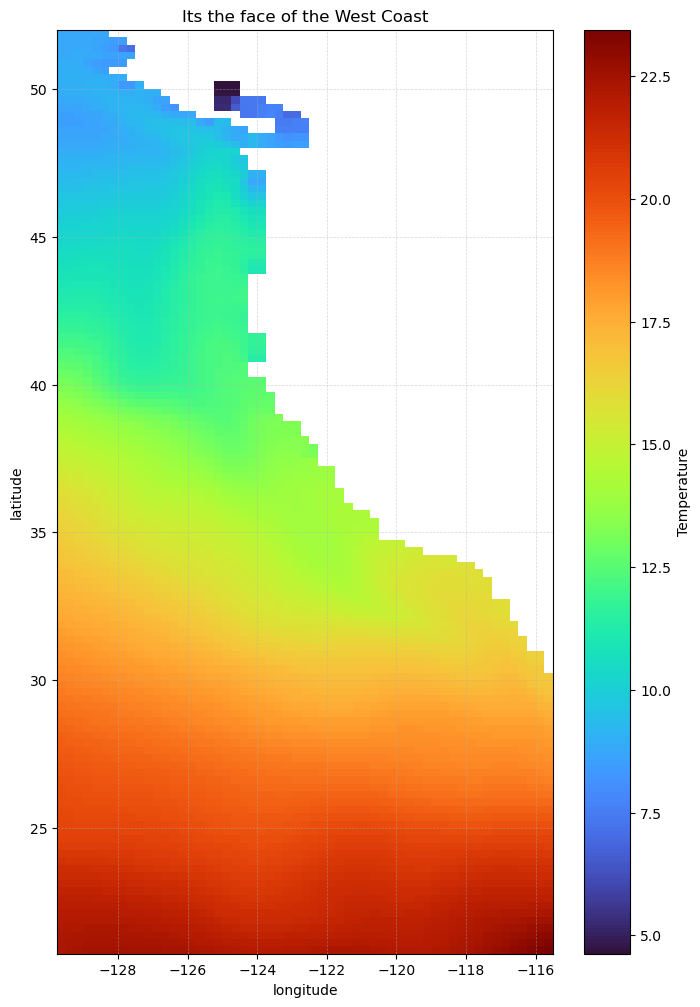

In [36]:
# make your figure here
fig = plt.figure(figsize=(8,12))

# plot the temperatures in black
C = plt.pcolormesh(longitude, latitude, SST_2017, cmap='turbo')
plt.colorbar(C, label='Temperature')


# format the axes
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Its the face of the West Coast')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)
# Homework is now Plotting!


## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [37]:
def plot_panel(year,month,day):
    some_year = str(year)
    # pads the string so at least it will always be in the form 01,02,03 ...31 for the string in the file.
    some_month = '{:02d}'.format(month)
    some_day = '{:02d}'.format(day)
    
    rotating_file_name = "SST_" +some_year+some_month+some_day+".nc"
    ds = nc4.Dataset(data_folder+'\\'+rotating_file_name)
    longitude = ds.variables['LONGITUDE_T'][:]
    latitude = ds.variables['LATITUDE_T'][:]
    SST = ds.variables['SST'][:,:,:]
    ds.close()
    SST = SST[0,:,:] # general info for computing my bounds for my individual screenshot
    
    # min/max row/col also inputting my certain bounds.
    min_col = np.argmin(np.abs(longitude - (-129.6931)))
    max_col = np.argmin(np.abs(longitude - (-115.25)))
    min_row = np.argmin(np.abs(latitude - (21)))
    max_row =np.argmin(np.abs(latitude - (52.2165)))
    
    #subset the data for the frame.
    SST_subset = SST[min_row:max_row,min_col:max_col]
    longitude_subset = longitude[min_col:max_col]
    latitude_subset = latitude[min_row:max_row] # slicing of a list
    
    
    # make your figure here
    fig = plt.figure(figsize=(8,12))
    
    # plot the temperatures in black
    C = plt.pcolormesh(longitude_subset, latitude_subset, SST_subset, cmap='turbo', vmin=8,vmax=22)
    plt.colorbar(C, label='Temperature')
    
    
    # format the axes
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    plt.title('Its the face of the West Coast')
    plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)
    
    
    # Homework is now Plotting!
    
    
    output_directory = 'D:\CS 185C\homework_3_frames'
    plt.savefig(output_directory+'\SST_'+some_year+some_month+some_day+'.png')
    plt.close(fig)

Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

In [38]:
# loop through the data and make a plot for each day
year = 2017
for month in range(1,13):
    if month in [1,3,5,7,8,10,12]:
        n_days = 31
    elif month in [4,6,9,11]:
        n_days = 30
    else:
        if year%4==0:
            n_days = 29
        else:
            n_days = 28
    for day in range(1,n_days+1):
        plot_panel(year,month,day)

C:\Users\blake\AppData\Local\Temp\ipykernel_18900\3787637985.py:11: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  SST = ds.variables['SST'][:,:,:]


## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [39]:
# make a list of files for each movie panel
file_list = []
panel_folder = 'D:\CS 185C\homework_3_frames'
for file_name in os.listdir(panel_folder):
    if file_name[-3:]=='png':
        file_list.append(panel_folder+'/'+file_name)

# sort the panels
file_list.sort()

In [40]:
# set the frames per second
fps=10

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)


# write the video to a file
clip.write_videofile('West Coast SST.mp4')


Moviepy - Building video West Coast SST.mp4.
Moviepy - Writing video West Coast SST.mp4



Moviepy - Done !
Moviepy - video ready West Coast SST.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

### Answer:
I noticed it seems like the warm water creeps to the north of the map meaning that the gyres are pushing water from the equator more from there and that overall temperature of the water is increasing over time creeping from winter to spring to summer then back to winter it cools again. Very cool to learn this! also its weird but the water seems to creep into the top of the map? I wonder what that is doing or if thats a design mistake.